In [39]:
#import libraries

In [1]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime


In [2]:
#import the prepared csv file to the model

In [3]:
df = pd.read_csv('C:/Users/vivek/Downloads/Historical-Weather-Data-Scraper-master/Final Birmingham weather and water Demand data.csv')
df = df.drop(['Unnamed: 0'] , axis = 1)
df.head() 

Date  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  2010-01-02         3        -1           1.0      7.9        1   
1  2010-01-03         1        -3           0.9      7.9        2   
2  2010-01-04         1        -3           0.0      7.9        2   
3  2010-01-05         2        -1           2.6      3.0        1   
4  2010-01-06         0        -4           1.4      4.9        1   

   moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  ...  WindGustKmph  \
0                 89         -1          -4           1  ...            27   
1                 82         -3          -5           0  ...            21   
2                 75         -4          -6          -2  ...            19   
3                 69         -1          -5           0  ...            21   
4                 62         -2          -7          -1  ...            37   

   cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0          55        89       1.4      1014      3           8            248   
1          21        85       1.0      1024      1           9             51   
2          12        86       0.0      1020      1          10            292   
3          77        93       3.0      1004      2           4            237   
4          65        92       1.7      1005      0           8            118   

   windspeedKmph  Demand  
0             15  695.63  
1             13  670.76  
2             11  658.42  
3             13  650.01  
4             22  680.07  

[5 rows x 21 columns]

In [4]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) #Check last few dates. 

4561   2022-06-29
4562   2022-06-30
4563   2022-07-01
4564   2022-07-02
4565   2022-07-03
4566   2022-07-04
4567   2022-07-05
4568   2022-07-06
4569   2022-07-07
4570   2022-07-08
4571   2022-07-09
4572   2022-07-10
4573   2022-07-11
4574   2022-07-12
4575   2022-07-13
Name: Date, dtype: datetime64[ns]


In [5]:
df.shape


(4576, 21)

In [6]:
#Changing the position of the demand column to the front for easy interpretation

In [7]:
first_column = df.pop('Demand')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(1, 'Demand', first_column)
  
print()
print("After Shifting column to first position")
display(df)


After Shifting column to first position


Date      Demand  maxtempC  mintempC  totalSnow_cm  sunHour  \
0     2010-01-02  695.630000         3        -1           1.0      7.9   
1     2010-01-03  670.760000         1        -3           0.9      7.9   
2     2010-01-04  658.420000         1        -3           0.0      7.9   
3     2010-01-05  650.010000         2        -1           2.6      3.0   
4     2010-01-06  680.070000         0        -4           1.4      4.9   
...          ...         ...       ...       ...           ...      ...   
4571  2022-07-09  801.837788        24        13           0.0     14.5   
4572  2022-07-10  820.075842        26        12           0.0     14.5   
4573  2022-07-11  850.709426        30        15           0.0     14.5   
4574  2022-07-12  820.920591        28        19           0.0     14.5   
4575  2022-07-13  413.161290        23        14           0.0     13.6   

      uvIndex  moon_illumination  DewPointC  FeelsLikeC  ...  WindChillC  \
0           1                 89         -1          -4  ...          -4   
1           2                 82         -3          -5  ...          -5   
2           2                 75         -4          -6  ...          -6   
3           1                 69         -1          -5  ...          -5   
4           1                 62         -2          -7  ...          -7   
...       ...                ...        ...         ...  ...         ...   
4571        6                 69         10          18  ...          18   
4572        6                 76         11          19  ...          19   
4573        7                 83         13          23  ...          23   
4574        6                 90         12          23  ...          23   
4575        4                 97          9          18  ...          18   

      WindGustKmph  cloudcover  humidity  precipMM  pressure  tempC  \
0               27          55        89       1.4      1014      3   
1               21          21        85       1.0      1024      1   
2               19          12        86       0.0      1020      1   
3               21          77        93       3.0      1004      2   
4               37          65        92       1.7      1005      0   
...            ...         ...       ...       ...       ...    ...   
4571            20          10        62       0.0      1031     24   
4572            17          21        64       0.0      1028     26   
4573            11          15        58       0.0      1023     30   
4574            18          45        53       0.0      1021     28   
4575            19          20        58       0.0      1023     23   

      visibility  winddirDegree  windspeedKmph  
0              8            248             15  
1              9             51             13  
2             10            292             11  
3              4            237             13  
4              8            118             22  
...          ...            ...            ...  
4571          10            326             15  
4572          10            323             12  
4573          10            272              7  
4574          10            241             13  
4575          10            317             14  

[4576 rows x 21 columns]

In [8]:
#Variables for training
cols = list(df)[1:21]
#Date and volume columns are not used in training. 
print(cols)

['Demand', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph']


In [9]:
df_for_training = df[cols].astype(float)

In [10]:
#Convert into variable into arrays

In [11]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


In [12]:
df_for_training.head()

Demand  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  695.63       3.0      -1.0           1.0      7.9      1.0   
1  670.76       1.0      -3.0           0.9      7.9      2.0   
2  658.42       1.0      -3.0           0.0      7.9      2.0   
3  650.01       2.0      -1.0           2.6      3.0      1.0   
4  680.07       0.0      -4.0           1.4      4.9      1.0   

   moon_illumination  DewPointC  FeelsLikeC  HeatIndexC  WindChillC  \
0               89.0       -1.0        -4.0         1.0        -4.0   
1               82.0       -3.0        -5.0         0.0        -5.0   
2               75.0       -4.0        -6.0        -2.0        -6.0   
3               69.0       -1.0        -5.0         0.0        -5.0   
4               62.0       -2.0        -7.0        -1.0        -7.0   

   WindGustKmph  cloudcover  humidity  precipMM  pressure  tempC  visibility  \
0          27.0        55.0      89.0       1.4    1014.0    3.0         8.0   
1          21.0        21.0      85.0       1.0    1024.0    1.0         9.0   
2          19.0        12.0      86.0       0.0    1020.0    1.0        10.0   
3          21.0        77.0      93.0       3.0    1004.0    2.0         4.0   
4          37.0        65.0      92.0       1.7    1005.0    0.0         8.0   

   winddirDegree  windspeedKmph  
0          248.0           15.0  
1           51.0           13.0  
2          292.0           11.0  
3          237.0           13.0  
4          118.0           22.0

In [13]:
df_for_training_scaled

array([[ 3.09197853e-01, -1.67135056e+00, -1.57912249e+00, ...,
        -4.59163624e-01,  6.21376593e-01,  2.83606113e-03],
       [-2.68970037e-01, -2.00363105e+00, -1.99477187e+00, ...,
         1.86742537e-01, -1.99527100e+00, -3.17603834e-01],
       [-5.55845460e-01, -2.00363105e+00, -1.99477187e+00, ...,
         8.32648698e-01,  1.20580550e+00, -6.38043729e-01],
       ...,
       [ 3.91442280e+00,  2.81443612e+00,  1.74607257e+00, ...,
         8.32648698e-01,  9.40155996e-01, -1.27892352e+00],
       [ 3.22190380e+00,  2.48215563e+00,  2.57737134e+00, ...,
         8.32648698e-01,  5.28399268e-01, -3.17603834e-01],
       [-6.25752261e+00,  1.65145439e+00,  1.53824788e+00, ...,
         8.32648698e-01,  1.53786737e+00, -1.57383886e-01]])

In [14]:
#Training 

In [15]:
trainX = []
trainY = []


In [16]:
df_for_training.shape[0]

4576

In [17]:
#Starting step doing a sample of collecting 14 days past data and to predict the next day 

In [18]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

In [19]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [20]:
trainX

[array([[ 3.09197853e-01, -1.67135056e+00, -1.57912249e+00,
          2.48948223e+00, -3.14468929e-01, -1.52424662e+00,
          1.35078648e+00, -1.61736271e+00, -1.77526431e+00,
         -1.64870374e+00, -1.77948924e+00,  4.05453078e-01,
         -8.85608826e-02,  7.37560130e-01, -1.59187994e-01,
         -4.93597284e-02, -1.67135056e+00, -4.59163624e-01,
          6.21376593e-01,  2.83606113e-03],
        [-2.68970037e-01, -2.00363105e+00, -1.99477187e+00,
          2.22826669e+00, -3.14468929e-01, -6.82572607e-01,
          1.10836479e+00, -2.03644832e+00, -1.92742887e+00,
         -1.83610669e+00, -1.93213888e+00, -2.07954444e-01,
         -1.44232944e+00,  2.65999802e-01, -2.79017614e-01,
          8.71056396e-01, -2.00363105e+00,  1.86742537e-01,
         -1.99527100e+00, -3.17603834e-01],
        [-5.55845460e-01, -2.00363105e+00, -1.99477187e+00,
         -1.22673117e-01, -3.14468929e-01, -6.82572607e-01,
          8.65943104e-01, -2.24599112e+00, -2.07959343e+00,
         -2.

In [21]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4562, 14, 20).
trainY shape == (4562, 1).


In [22]:
#Constructing a LSTM model

In [23]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            21760     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 34,209
Trainable params: 34,209
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Building the model 

In [25]:
history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/30
257/257 [==============================] - 20s 59ms/step - loss: 0.4479 - val_loss: 0.5225
Epoch 2/30
257/257 [==============================] - 14s 53ms/step - loss: 0.3128 - val_loss: 0.4824
Epoch 3/30
257/257 [==============================] - 13s 52ms/step - loss: 0.2812 - val_loss: 0.4586
Epoch 4/30
257/257 [==============================] - 13s 49ms/step - loss: 0.2552 - val_loss: 0.4229
Epoch 5/30
257/257 [==============================] - 13s 52ms/step - loss: 0.2589 - val_loss: 0.4308
Epoch 6/30
257/257 [==============================] - 13s 51ms/step - loss: 0.2468 - val_loss: 0.4598
Epoch 7/30
257/257 [==============================] - 13s 51ms/step - loss: 0.2385 - val_loss: 0.4577
Epoch 8/30
257/257 [==============================] - 13s 51ms/step - loss: 0.2367 - val_loss: 0.4288
Epoch 9/30
257/257 [==============================] - 13s 52ms/step - loss: 0.2331 - val_loss: 0.4244
Epoch 10/30
257/257 [==============================] - 13s 51ms/step - loss: 0.224

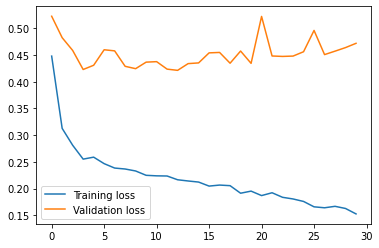

In [26]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [27]:
#Curves initally shows overfitting.Need to work on avoiding the same

In [20]:
n_future = 8 #7 days + 1 existing day

In [21]:
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()
forecast = model.predict(trainX[-n_future:])

1/1 [==============================] - 1s 1s/step


In [22]:
forecast_period_dates

[Timestamp('2022-07-13 00:00:00', freq='D'),
 Timestamp('2022-07-14 00:00:00', freq='D'),
 Timestamp('2022-07-15 00:00:00', freq='D'),
 Timestamp('2022-07-16 00:00:00', freq='D'),
 Timestamp('2022-07-17 00:00:00', freq='D'),
 Timestamp('2022-07-18 00:00:00', freq='D'),
 Timestamp('2022-07-19 00:00:00', freq='D'),
 Timestamp('2022-07-20 00:00:00', freq='D')]

In [23]:
forecast.shape

(8, 1)

In [24]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [25]:
y_pred_future

array([712.7029 , 723.6458 , 743.58966, 763.77   , 773.04425, 782.0601 ,
       802.39484, 785.23816], dtype=float32)

In [26]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    


In [28]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Demand':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])




In [28]:
#the water demand for Birmingham for the next 7 days

In [37]:
df_forecast.head(8)

Date      Demand
0 2022-07-13  712.702881
1 2022-07-14  723.645813
2 2022-07-15  743.589661
3 2022-07-16  763.770020
4 2022-07-17  773.044250
5 2022-07-18  782.060120
6 2022-07-19  802.394836
7 2022-07-20  785.238159

In [30]:
df_forecast.shape

(8, 2)

In [33]:
original = df[['Date', 'Demand']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2022-6-1']



C:\Users\vivek\AppData\Local\Temp\ipykernel_33604\288970909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


C:\Users\vivek\miniconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vivek\miniconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Demand'>

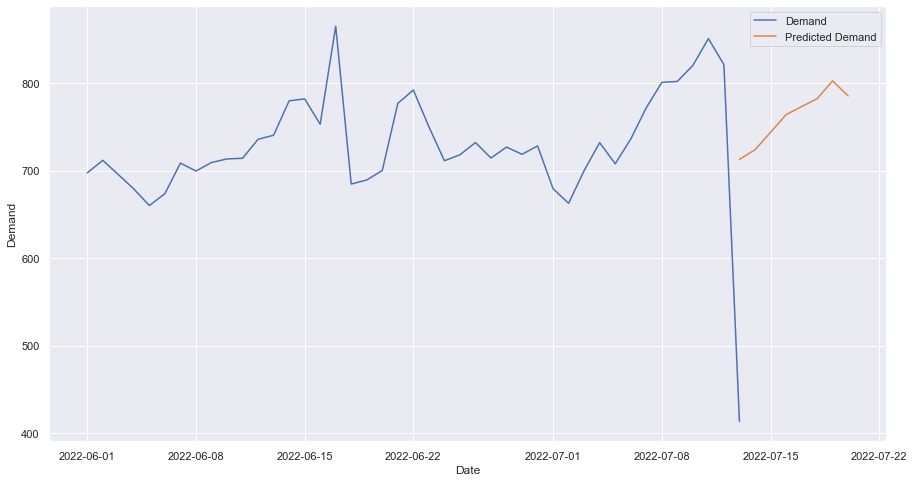

In [36]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(original['Date'], original['Demand'],label="Demand")

sns.lineplot(df_forecast['Date'], df_forecast['Demand'], label="Predicted Demand")